In [175]:

import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from textblob import TextBlob
from wordcloud import WordCloud


In [176]:

from google.colab import files
file = files.upload()
df = pd.read_csv("Cleaned_Tweets (1).csv")
df.head()

KeyboardInterrupt: ignored

In [177]:
df=df[['text']][0:20000]
df

,text
0,Blue Ridge Bank shares halted by NYSE after #b...
1,"😎 Today, that's this #Thursday, we will do a ""..."
2,"Guys evening, I have read this article about B..."
3,$BTC A big chance in a billion! Price: \487264...
4,This network is secured by 9 508 nodes as of t...
...,...
19995,@HusseinChindo @kayodebakre8 Wrong! #Bitcoin i...
19996,LINK IN MY BIO!!! \nFlex is dropping officiall...
19997,#Bitcoin #Btc\n\nWait and see.... https://t.co...
19998,"Wow! For any of you Rick and Morty fans, check..."


In [178]:
def cleanTwt(twt):
    twt = re.sub("#bitcoin", 'bitcoin', twt) # removes the '#' from bitcoin
    twt = re.sub("#Bitcoin", 'Bitcoin', twt) # removes the '#' from Bitcoin
    twt = re.sub('#[A-Za-z0-9]+', '', twt) # removes any string with a '#'
    twt = re.sub('\\n', '', twt) # removes the '\n' string
    twt = re.sub('https:\/\/\S+', '', twt) # removes any hyperlinks
    twt = re.sub('@[A-Za-z0-9]+', '', twt)  # removes @ 
    twt = re.sub('![A-Za-z0-9]+', '', twt)  # removes !
    twt = re.sub('$[A-Za-z0-9]+', '',twt) # remove $
    twt = re.sub("$BTC", 'BTC', twt) # remove $
    return twt



In [179]:
df['cleaned_tweets'] = df['text'].apply(cleanTwt)
df

,text,cleaned_tweets
0,Blue Ridge Bank shares halted by NYSE after #b...,Blue Ridge Bank shares halted by NYSE after bi...
1,"😎 Today, that's this #Thursday, we will do a ""...","😎 Today, that's this , we will do a ""🎬 Take 2""..."
2,"Guys evening, I have read this article about B...","Guys evening, I have read this article about B..."
3,$BTC A big chance in a billion! Price: \487264...,$BTC A big chance in a billion! Price: \487264...
4,This network is secured by 9 508 nodes as of t...,This network is secured by 9 508 nodes as of t...
...,...,...
19995,@HusseinChindo @kayodebakre8 Wrong! #Bitcoin i...,"Wrong! Bitcoin is legal in Japan, US, France..."
19996,LINK IN MY BIO!!! \nFlex is dropping officiall...,LINK IN MY BIO!!! Flex is dropping officially ...
19997,#Bitcoin #Btc\n\nWait and see.... https://t.co...,Bitcoin Wait and see....
19998,"Wow! For any of you Rick and Morty fans, check...","Wow! For any of you Rick and Morty fans, check..."


In [180]:
def getSubjectivity(twt):
    return TextBlob(twt).sentiment.subjectivity

# create a function to get the polarity
def getPolarity(twt):
    return TextBlob(twt).sentiment.polarity

# create two new columns called "Subjectivity" & "Polarity"
df['subjectivity'] = df['cleaned_tweets'].apply(getSubjectivity)
df['polarity'] = df['cleaned_tweets'].apply(getPolarity)

In [181]:
from numpy.ma.core import negative

# create a function get the sentiment text
def getSentiment(score):
    if score < 0:
        return "negative"
    elif score == 0:
        return "neutral"
    else:
        return "positive"

In [182]:
df['sentiment'] = df['polarity'].apply(getSentiment)

# show the data
df.head()

,text,cleaned_tweets,subjectivity,polarity,sentiment
0,Blue Ridge Bank shares halted by NYSE after #b...,Blue Ridge Bank shares halted by NYSE after bi...,0.1,0.0,neutral
1,"😎 Today, that's this #Thursday, we will do a ""...","😎 Today, that's this , we will do a ""🎬 Take 2""...",0.0,0.0,neutral
2,"Guys evening, I have read this article about B...","Guys evening, I have read this article about B...",0.0,0.0,neutral
3,$BTC A big chance in a billion! Price: \487264...,$BTC A big chance in a billion! Price: \487264...,0.1,0.0,neutral
4,This network is secured by 9 508 nodes as of t...,This network is secured by 9 508 nodes as of t...,0.1,0.0,neutral


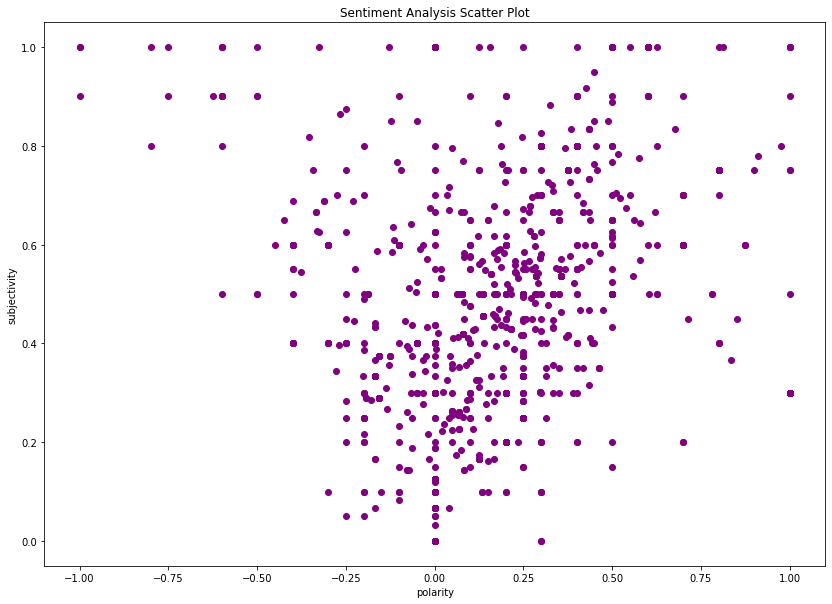

In [183]:
# create a scatter plot to show the subjectivity and the polarity
plt.figure(figsize=(14,10))

for i in range(0, 2000):
    plt.scatter(df["polarity"].iloc[[i]].values[0], df["subjectivity"].iloc[[i]].values[0], color="Purple")

plt.title("Sentiment Analysis Scatter Plot")
plt.xlabel('polarity')
plt.ylabel('subjectivity')
plt.show()



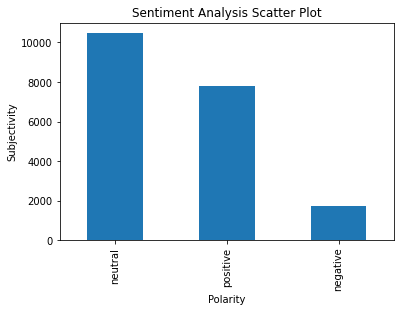

In [184]:
# create a bar chart to show the cout of Positive, Neutral and Nehative sentiments
df['sentiment'].value_counts().plot(kind="bar")
plt.title("Sentiment Analysis Scatter Plot")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

In [185]:
text2 = " ".join(title for title in df.cleaned_tweets)

In [186]:
word_cloud2 = WordCloud(width=1000, height=500,collocations = False, background_color = 'white').generate(text2)


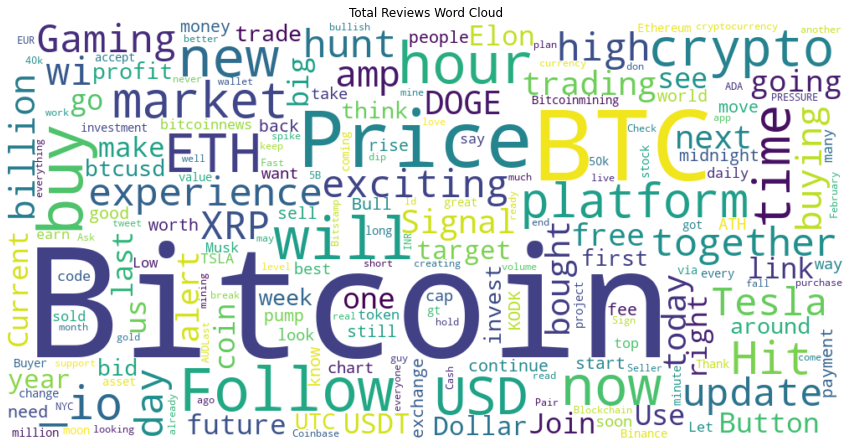

In [187]:
plt.figure(figsize=(15,10))
plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")
plt.title('Total Reviews Word Cloud')
plt.show()